In [1]:
import pandas as pd
import numpy as np

import os, json

## Read rss data

In [2]:
# Read Json files
path_to_json = 'rssData'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
#print(json_files)

In [3]:
# Go through Json files 
base_dir = 'rssData'

#Get all files in the directory

data_list = []
for file in os.listdir(base_dir):

    #If file is a json, construct it's full path and open it, append all json data to list
    if 'json' in file:
        json_path = os.path.join(base_dir, file)
        json_data = pd.read_json(json_path, lines=True)
        data_list.append(json_data)

#print(data_list)

In [4]:
len(data_list)

198

In [5]:
data_list[0].text

0    
Name: text, dtype: object

In [6]:
data_list[0].text.values

array([''], dtype=object)

In [7]:
# Get text data and remove empty texts
all_text=[]
for i in range(len(data_list)):
    if (data_list[i].text.values!=''):
        text=list(data_list[i].text)
#         print(type(text))
        all_text.append(text)
        #print(data_list[i].text)
        #print(text)
#print(all_text)

In [8]:
len(all_text)

147

In [44]:
# all_text_df['lenght'] = all_text_df.apply(lambda row:len(row),axis=1)

In [45]:
# all_text_df.head()

## Implement NLP techniques

In [11]:
import spacy

In [12]:
nlp = spacy.load('en_core_web_sm')

### Preprocessing and cleaning

In [13]:
# function to clean data
#lower case
#remove stop words
#lemmatization

def cleanData(doc):
    doc = doc.lower()
    doc = nlp(doc)
    tokens = [tokens.lower_ for tokens in doc]
    tokens = [tokens for tokens in doc if (tokens.is_stop == False)]
    tokens = [tokens for tokens in tokens if (tokens.is_punct == False)]
    final_token = [token.lemma_ for token in tokens]
    
    return " ".join(final_token)

In [17]:
# all_text[0][0]

In [18]:
doc1= all_text[0][0]
len(doc1)
# print(doc1)

10348

In [19]:
cleaned_doc1 =cleanData(doc1)
len(cleaned_doc1)

6580

In [20]:
all_text_df= pd.DataFrame(all_text, columns=['text'])
all_text_df.head()

,text
0,"The 911 service as it existed until July 28, 2..."
1,"DanielMiessler Created/Updated: July 25, 2022 ..."
2,The 911 service as it exists today.For the pas...
3,DanielMiesslerMy first thought on the whole di...
4,"DanielMiesslerWell, our congressional heroes f..."


In [21]:
cl = cleanData(all_text_df['text'][0])
len(cl)

6580

In [22]:
all_text_df['clean'] = all_text_df.apply(lambda row:cleanData (row['text']),axis=1)

In [23]:
all_text_df.head()

,text,clean
0,"The 911 service as it existed until July 28, 2...",911 service exist july 28 2022.911[.]re proxy ...
1,"DanielMiessler Created/Updated: July 25, 2022 ...",danielmiessler create update july 25 2022 read...
2,The 911 service as it exists today.For the pas...,911 service exist today.for past seven year on...
3,DanielMiesslerMy first thought on the whole di...,danielmiesslermy think discussion sure musk ar...
4,"DanielMiesslerWell, our congressional heroes f...",danielmiesslerwell congressional hero finally ...


In [458]:
all_text_df['clean'][1]

'danielmiessler create update july 25 2022 reading term concept bourgeoisie come afford light grasp learn mis learn forget relearn definition time force create page remind myself.here summary language town like word start like burg”.what gpt-3 think modern bourgeois party look likehere openai gpt-3 think bourgeoisie mean term bourgeoisie refer social class consider elite society typically high level education hold position power influence characterize wealth luxurious lifestyle.gpt-3so weight elite.the word bourgeoisie describe middle upper class society people typically educate high pay job enjoy comfortable lifestyle material possessions.gpt-3this say middle upper.the word bourgeoisie describe middle class society typically country significant difference wealthy poor class bourgeois class typically see wealthy wealthy aristocracy consider educated cultured work class.gpt-3and say middle mention educated cultured workers.these gpt-3 summary interesting capture conflicting messaging ba

In [30]:
#function to Tokenization, POS, NER
# def TAG(clean):
#     token_list=[]
#     pos_list=[]
#     ner_list=[]
#     clean = nlp(clean)
#     for token in clean:
#         token_list.append(token)
#         pos_list.append(token.pos_)
#         for ent in clean.ents:
#             ner_list.append(ent.label_)
        
#     return(token_list, pos_list, ner_list)      

### Tokenization

In [32]:
#function to Tokenization
def Token(clean):
    token_list=[]
    clean = nlp(clean)
    for token in clean:
        token_list.append(token)
    return(token_list)      

In [33]:
# Token(all_text_df['clean'][0])

In [34]:
all_text_df['token'] = all_text_df.apply(lambda row:Token (row['clean']),axis=1)

In [35]:
all_text_df.head()

,text,clean,token
0,"The 911 service as it existed until July 28, 2...",911 service exist july 28 2022.911[.]re proxy ...,"[911, service, exist, july, 28, 2022.911[.]re,..."
1,"DanielMiessler Created/Updated: July 25, 2022 ...",danielmiessler create update july 25 2022 read...,"[danielmiessler, create, update, july, 25, 202..."
2,The 911 service as it exists today.For the pas...,911 service exist today.for past seven year on...,"[911, service, exist, today.for, past, seven, ..."
3,DanielMiesslerMy first thought on the whole di...,danielmiesslermy think discussion sure musk ar...,"[danielmiesslermy, think, discussion, sure, mu..."
4,"DanielMiesslerWell, our congressional heroes f...",danielmiesslerwell congressional hero finally ...,"[danielmiesslerwell, congressional, hero, fina..."


### POS tagging

In [36]:
#function to POS tagging
def POS(clean):
    pos_list=[]
    clean = nlp(clean)
    for token in clean:
        pos_list.append(token.pos_)
    return(pos_list)   

In [37]:
# POS(all_text_df['clean'][0])

In [38]:
all_text_df['pos_tag'] = all_text_df.apply(lambda row:POS (row['clean']),axis=1)

In [39]:
all_text_df.head()

,text,clean,token,pos_tag
0,"The 911 service as it existed until July 28, 2...",911 service exist july 28 2022.911[.]re proxy ...,"[911, service, exist, july, 28, 2022.911[.]re,...","[NUM, NOUN, VERB, PROPN, NUM, NUM, NOUN, NOUN,..."
1,"DanielMiessler Created/Updated: July 25, 2022 ...",danielmiessler create update july 25 2022 read...,"[danielmiessler, create, update, july, 25, 202...","[NOUN, VERB, NOUN, PROPN, NUM, NUM, NOUN, NOUN..."
2,The 911 service as it exists today.For the pas...,911 service exist today.for past seven year on...,"[911, service, exist, today.for, past, seven, ...","[NUM, NOUN, VERB, ADP, ADJ, NUM, NOUN, NOUN, N..."
3,DanielMiesslerMy first thought on the whole di...,danielmiesslermy think discussion sure musk ar...,"[danielmiesslermy, think, discussion, sure, mu...","[NOUN, VERB, NOUN, ADJ, PROPN, VERB, X, VERB, ..."
4,"DanielMiesslerWell, our congressional heroes f...",danielmiesslerwell congressional hero finally ...,"[danielmiesslerwell, congressional, hero, fina...","[VERB, ADJ, NOUN, ADV, VERB, VERB, NOUN, NOUN,..."


### Named Entity Recognition (NER)

In [40]:
#function to NER 
# Iterate over the predicted entities
def NER(clean):
    ner_list=[]
    clean = nlp(clean)
    for ent in clean.ents:
        ner_list.append(ent.label_)
    return(ner_list)   

In [41]:
all_text_df['ner_tag'] = all_text_df.apply(lambda row:NER (row['clean']),axis=1)

In [42]:
all_text_df.head()

,text,clean,token,pos_tag,ner_tag
0,"The 911 service as it existed until July 28, 2...",911 service exist july 28 2022.911[.]re proxy ...,"[911, service, exist, july, 28, 2022.911[.]re,...","[NUM, NOUN, VERB, PROPN, NUM, NUM, NOUN, NOUN,...","[CARDINAL, DATE, DATE, CARDINAL, ORG, DATE, DA..."
1,"DanielMiessler Created/Updated: July 25, 2022 ...",danielmiessler create update july 25 2022 read...,"[danielmiessler, create, update, july, 25, 202...","[NOUN, VERB, NOUN, PROPN, NUM, NUM, NOUN, NOUN...","[DATE, NORP, CARDINAL, DATE]"
2,The 911 service as it exists today.For the pas...,911 service exist today.for past seven year on...,"[911, service, exist, today.for, past, seven, ...","[NUM, NOUN, VERB, ADP, ADJ, NUM, NOUN, NOUN, N...","[CARDINAL, DATE, CARDINAL, CARDINAL, ORG, DATE..."
3,DanielMiesslerMy first thought on the whole di...,danielmiesslermy think discussion sure musk ar...,"[danielmiesslermy, think, discussion, sure, mu...","[NOUN, VERB, NOUN, ADJ, PROPN, VERB, X, VERB, ...",[PERSON]
4,"DanielMiesslerWell, our congressional heroes f...",danielmiesslerwell congressional hero finally ...,"[danielmiesslerwell, congressional, hero, fina...","[VERB, ADJ, NOUN, ADV, VERB, VERB, NOUN, NOUN,...","[ORG, DATE, ORG, PERSON]"


In [148]:
# len(all_text_df['ner_tag'][0])

In [149]:
# len(all_text_df['pos_tag'][0])

In [150]:
doc=nlp(all_text_df['clean'][0])

In [151]:
# len(doc)

In [152]:
POS_counts = doc.count_by(spacy.attrs.POS)
# POS_counts

In [460]:
# for k,v in (POS_counts.items()):
#     print(doc.vocab[k].text,round(v/len(doc),2))

In [461]:
for k,v in (POS_counts.items()):
    print(doc.vocab[k].text,v)

NUM 64
NOUN 463
VERB 114
PROPN 92
ADJ 109
ADV 28
SCONJ 2
DET 3
ADP 6
PUNCT 12
PART 2
X 6
PRON 3
AUX 1
SPACE 11
SYM 1


In [463]:
for k,v in (POS_counts.items()):
    print(doc.vocab[k].text,round(v/len(doc),2))

NUM 0.07
NOUN 0.5
VERB 0.12
PROPN 0.1
ADJ 0.12
ADV 0.03
SCONJ 0.0
DET 0.0
ADP 0.01
PUNCT 0.01
PART 0.0
X 0.01
PRON 0.0
AUX 0.0
SPACE 0.01
SYM 0.0


In [155]:
# freq_list=[[] for _ in range(2)]
# freq_list

In [123]:
# POS_tag Frequency function
# Calculate frequency based on the lenght of each row (freuency of each word divided by the lenght of total text)
# Filtering frequency of above 10%

def Freq(clean):
    freq_list=[]
    doc = nlp(clean)
    POS_counts = doc.count_by(spacy.attrs.POS)
    for k,v in (POS_counts.items()):
        v = round(v/len(doc),2)
        if v> 0.1 :
            freq_list.append([doc.vocab[k].text,v])
        
    return(freq_list)

In [124]:
Freq(doc) 

[['NOUN', 0.5], ['VERB', 0.12], ['ADJ', 0.12]]

In [125]:
all_text_df['Freq_pos'] = all_text_df.apply(lambda row:Freq (row['clean']),axis=1)

In [126]:
all_text_df.head()

,text,clean,token,pos_tag,ner_tag,Freq_pos
0,"The 911 service as it existed until July 28, 2...",911 service exist july 28 2022.911[.]re proxy ...,"[911, service, exist, july, 28, 2022.911[.]re,...","[NUM, NOUN, VERB, PROPN, NUM, NUM, NOUN, NOUN,...","[CARDINAL, DATE, DATE, CARDINAL, ORG, DATE, DA...","[[NOUN, 0.5], [VERB, 0.12], [ADJ, 0.12]]"
1,"DanielMiessler Created/Updated: July 25, 2022 ...",danielmiessler create update july 25 2022 read...,"[danielmiessler, create, update, july, 25, 202...","[NOUN, VERB, NOUN, PROPN, NUM, NUM, NOUN, NOUN...","[DATE, NORP, CARDINAL, DATE]","[[NOUN, 0.42], [VERB, 0.2], [ADJ, 0.18]]"
2,The 911 service as it exists today.For the pas...,911 service exist today.for past seven year on...,"[911, service, exist, today.for, past, seven, ...","[NUM, NOUN, VERB, ADP, ADJ, NUM, NOUN, NOUN, N...","[CARDINAL, DATE, CARDINAL, CARDINAL, ORG, DATE...","[[NOUN, 0.51], [VERB, 0.13], [ADJ, 0.12], [PRO..."
3,DanielMiesslerMy first thought on the whole di...,danielmiesslermy think discussion sure musk ar...,"[danielmiesslermy, think, discussion, sure, mu...","[NOUN, VERB, NOUN, ADJ, PROPN, VERB, X, VERB, ...",[PERSON],"[[NOUN, 0.45], [VERB, 0.24], [ADJ, 0.11], [PRO..."
4,"DanielMiesslerWell, our congressional heroes f...",danielmiesslerwell congressional hero finally ...,"[danielmiesslerwell, congressional, hero, fina...","[VERB, ADJ, NOUN, ADV, VERB, VERB, NOUN, NOUN,...","[ORG, DATE, ORG, PERSON]","[[VERB, 0.18], [ADJ, 0.11], [NOUN, 0.51]]"


### Perform Frequency of POS and NER for one Json file

In [286]:
all_text_df['Freq_pos'][0]

[['NOUN', 0.5], ['VERB', 0.12], ['ADJ', 0.12]]

In [310]:
df1 = pd.DataFrame(all_text_df['Freq_pos'][0], columns=['POS','Freq'])

In [311]:
df1

,POS,Freq
0,NOUN,0.50
1,VERB,0.12
2,ADJ,0.12


In [312]:
import matplotlib.pyplot as plt
import seaborn as sns

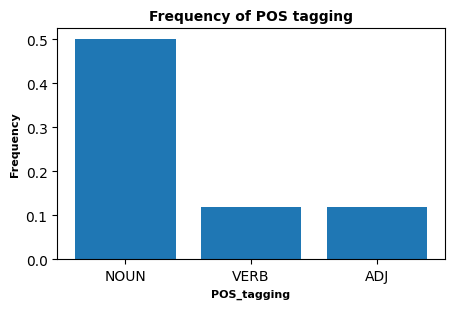

In [313]:
fig = plt.figure(figsize =(5, 3))
plt.bar(df1['POS'],df1['Freq'])
plt.xlabel("POS_tagging",fontweight ='bold',fontsize=8)
plt.ylabel("Frequency",fontweight ='bold',fontsize=8)
plt.title("Frequency of POS tagging",fontweight ='bold',fontsize=10)
plt.show()

In [349]:
df_big=pd.DataFrame()
for i in range(len(all_text_df)):
    df = pd.DataFrame(all_text_df['Freq_pos'][i], columns=['POS','Freq'])
    df_big = df_big.append(df)

C:\Users\msalehi\AppData\Local\Temp\ipykernel_1404\3012259823.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_big = df_big.append(df)
C:\Users\msalehi\AppData\Local\Temp\ipykernel_1404\3012259823.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_big = df_big.append(df)
C:\Users\msalehi\AppData\Local\Temp\ipykernel_1404\3012259823.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_big = df_big.append(df)
C:\Users\msalehi\AppData\Local\Temp\ipykernel_1404\3012259823.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_big = df_big.append(df)
C:\Users\msalehi\AppData\Local\Temp\ipykernel_1404\3012259823.py:4: FutureWarnin

In [357]:
# df_big

In [358]:
all_text_df.shape

(147, 6)

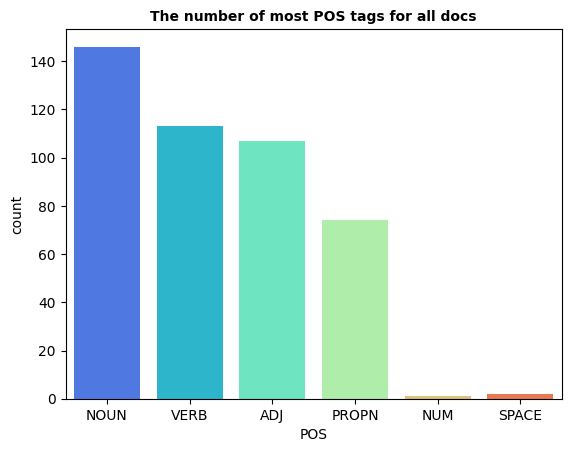

In [397]:
sns.countplot(x='POS', data= df_big, palette='rainbow')

plt.title("The number of most POS tags for all docs",fontweight ='bold',fontsize=10)
plt.show()

In [373]:
from collections import Counter

list(Counter(all_text_df['ner_tag'][0]).keys()) # equals to list(set(words))
list(Counter(all_text_df['ner_tag'][0]).values()) # counts the elements' frequency

[40, 14, 7, 4, 2, 1, 2]

In [468]:
data= {'ner':list (Counter(all_text_df['ner_tag'][0]).keys()),'freq':list (Counter(all_text_df['ner_tag'][0]).values())}

In [469]:
df2 = pd.DataFrame(data)

In [470]:
df2

,ner,freq
0,CARDINAL,40
1,DATE,14
2,ORG,7
3,PERSON,4
4,TIME,2
5,QUANTITY,1
6,GPE,2


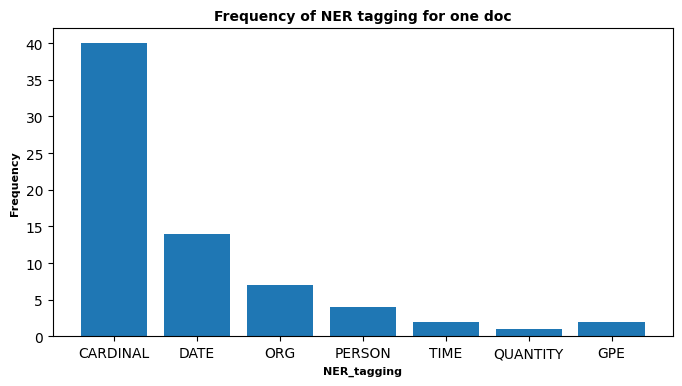

In [471]:
fig = plt.figure(figsize =(8, 4))
plt.bar(df2['ner'],df2['freq'])
plt.xlabel("NER_tagging",fontweight ='bold',fontsize=8)
plt.ylabel("Frequency",fontweight ='bold',fontsize=8)
plt.title("Frequency of NER tagging for one doc",fontweight ='bold',fontsize=10)
plt.show()

In [472]:
[ent for ent in (nlp(all_text_df['clean'][0])).ents if ent.label_=='ORG']

[microsoft, websiteâs, âwe, quality.my, ccp, ccp, new york times]

In [473]:
from spacy import displacy

In [430]:
displacy.render((nlp(all_text_df['clean'][0])), style='ent', jupyter=True)

In [475]:
options = {'ents': ['ORG', 'PERSON','GPE']}

displacy.render((nlp(all_text_df['clean'][2])), style='ent', jupyter=True, options=options)

In [450]:
# list(nlp(all_text_df['clean'][2]).sents)

In [411]:
# df_big2 = pd.DataFrame()
# for i in range(len(all_text_df['ner_tag'])):
#     data= {'ner':list (Counter(all_text_df['ner_tag'][i]).keys()),'freq':list (Counter(all_text_df['ner_tag'][0]).values())}
#     df0 = pd.DataFrame(data)
#     df_big2 = df_big2.append(df0)

In [438]:
# pd.DataFrame(all_text_df['ner_tag'].value_counts())

In [54]:
# Tokenazition & POS tagging 
# for token in doc2:
#     print(token.text,'\t',token.pos_,'\t')

In [282]:
# stop words

# default stop word library in spacy
# print(nlp.Defaults.stop_words)

In [26]:
# nlp2 = spacy.load("en_core_web_sm", disable=['parser', 'tagger', 'ner'])
# stops = nlp.Defaults.stop_words

# def normalize(comment, lowercase, remove_stopwords):
#     if lowercase:
#         comment = comment.lower()
#     comment = nlp(comment)
#     lemmatized = list()
#     for word in comment:
#         lemma = word.lemma_.strip()
#         if lemma:
#             if not remove_stopwords or (remove_stopwords and lemma not in stops):
#                 lemmatized.append(lemma)
#     return " ".join(lemmatized)

In [27]:
# Text_After_Clean = normalize(doc1,lowercase=True, remove_stopwords=True)
# len(Text_After_Clean)